In [1]:
from google.colab import files
uploaded = files.upload()

Saving boston.csv to boston (1).csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os

In [3]:
data = pd.read_csv("boston.csv")

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_normalized = scaler_X.fit_transform(X_train)
y_train_normalized = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

X_test_normalized = scaler_X.transform(X_test)
y_test_normalized = scaler_y.transform(y_test.reshape(-1, 1)).ravel()


In [5]:
def gradient_descent(X_train, y_train, learning_rate, num_iterations):
    n_samples, n_features = X_train.shape
    w = np.random.randn(n_features)

    for _ in range(num_iterations):
        y_train_pred = np.dot(X_train, w)
        gradient = (1/n_samples) * np.dot(X_train.T, (y_train - y_train_pred))
        w -= learning_rate * gradient

    return w

def gradient_descent_with_l2(X_train, y_train, learning_rate, num_iterations, lambda_):
    n_samples, n_features = X_train.shape
    w = np.random.randn(n_features)

    for _ in range(num_iterations):
        y_train_pred = np.dot(X_train, w)
        error = y_train_pred - y_train
        gradient = (1/n_samples) * np.dot(X_train.T, error)
        regularization_term = lambda_ * w[1:]
        gradient[1:] += regularization_term

        w -= learning_rate * gradient

    return w

def predict(X, weights):
    return np.dot(X, weights)


def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))


In [6]:
rmse_train = []
rmse_test = []

for P in range(1, 12):
    X_train_P = np.column_stack([X_train_normalized**i for i in range(1, P + 1)])
    X_test_P = np.column_stack([X_test_normalized**i for i in range(1, P + 1)])

    X_train_P = np.column_stack([np.ones(X_train_P.shape[0]), X_train_P])
    X_test_P = np.column_stack([np.ones(X_test_P.shape[0]), X_test_P])

    learning_rate = 0.001
    num_iterations = 1


    w = gradient_descent(X_train_P, y_train_normalized, learning_rate, num_iterations)

    y_train_pred = predict(X_train_P, w)
    y_test_pred = predict(X_test_P, w)

    y_train_pred_denorm = scaler_y.inverse_transform(y_train_pred.reshape(-1, 1)).ravel()
    y_test_pred_denorm = scaler_y.inverse_transform(y_test_pred.reshape(-1, 1)).ravel()

    rmse_train.append(calculate_rmse(y_train , y_train_pred_denorm))
    rmse_test.append(calculate_rmse(y_test , y_test_pred_denorm))

In [7]:
rmse_train

[61.16892058264789,
 108.03237578705004,
 2137.1827954823652,
 702698.2562087188,
 402250389.9833953,
 251237540304.32138,
 342399329746387.3,
 9.093798484784848e+16,
 1.8000487615257897e+20,
 1.5821749680248724e+23,
 2.0352243882545606e+25]

In [8]:
rmse_test

[59.987003851877624,
 90.14602625876577,
 371.1671677117727,
 35089.2263395974,
 8385636.471471735,
 2172199169.2053723,
 1220161766530.96,
 132926415688364.56,
 1.0755921452024387e+17,
 3.855326620682475e+19,
 2.0190553658766236e+21]

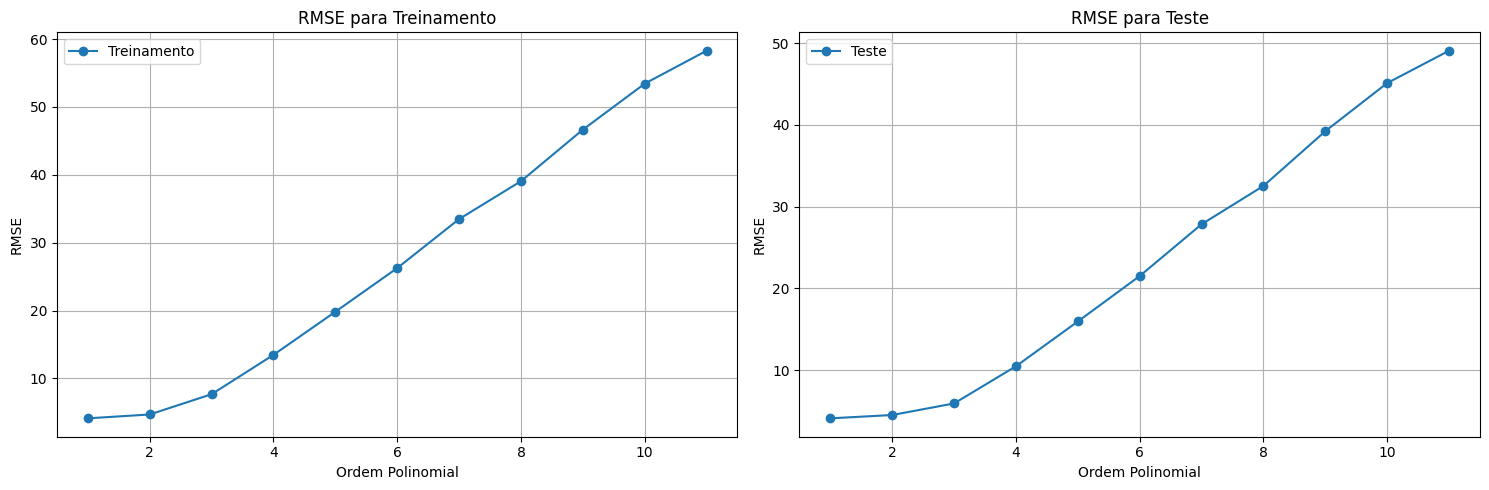

In [9]:
log_rmse_train = np.log(rmse_train)
log_rmse_test = np.log(rmse_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(range(1, 12), log_rmse_train, marker='o', label='Treinamento')
ax1.set_title('RMSE para Treinamento')
ax1.set_xlabel('Ordem Polinomial')
ax1.set_ylabel('RMSE')
ax1.legend()
ax1.grid(True)

ax2.plot(range(1, 12), log_rmse_test, marker='o', label='Teste')
ax2.set_title('RMSE para Teste')
ax2.set_xlabel('Ordem Polinomial')
ax2.set_ylabel('RMSE')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [10]:
rmse_train_l2 = []
rmse_test_l2 = []

for P in range(1, 12):
    X_train_P = np.column_stack([X_train_normalized**i for i in range(1, P + 1)])
    X_test_P = np.column_stack([X_test_normalized**i for i in range(1, P + 1)])

    X_train_P = np.column_stack([np.ones(X_train_P.shape[0]), X_train_P])
    X_test_P = np.column_stack([np.ones(X_test_P.shape[0]), X_test_P])

    learning_rate = 0.001
    num_iterations = 1
    lambda_ = 0.01

    w = gradient_descent_with_l2(X_train_P, y_train_normalized, learning_rate, num_iterations, lambda_)

    y_train_pred = predict(X_train_P, w)
    y_test_pred = predict(X_test_P, w)

    y_train_pred_denorm = scaler_y.inverse_transform(y_train_pred.reshape(-1, 1)).ravel()
    y_test_pred_denorm = scaler_y.inverse_transform(y_test_pred.reshape(-1, 1)).ravel()

    rmse_train_l2.append(calculate_rmse(y_train , y_train_pred_denorm))
    rmse_test_l2.append(calculate_rmse(y_test , y_test_pred_denorm))

In [11]:
rmse_train_l2

[44.1681903801855,
 108.70879785945165,
 834.1528550847474,
 148407.08456609695,
 901196500.7591666,
 233050686461.98007,
 52850796249374.81,
 3.310512166841063e+17,
 1.5798812792706145e+20,
 2.512557639975273e+22,
 9.66668657913955e+25]

In [12]:
rmse_test_l2

[40.67303892191146,
 83.73127127516882,
 236.26737317496912,
 7409.429410667932,
 18787007.980184715,
 2014965688.1477282,
 188335115790.54178,
 483921870233851.2,
 9.440423751730501e+16,
 6.122292471904407e+18,
 9.58994889227676e+21]

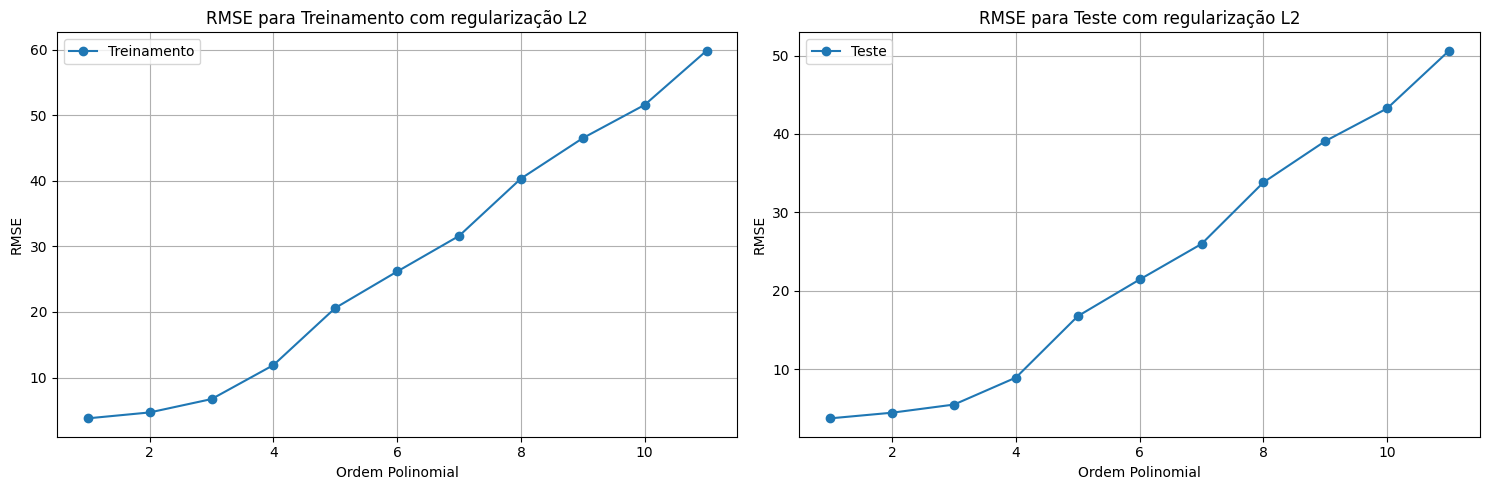

In [13]:
log_rmse_train = np.log(rmse_train_l2)
log_rmse_test = np.log(rmse_test_l2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(range(1, 12), log_rmse_train, marker='o', label='Treinamento')
ax1.set_title('RMSE para Treinamento com regularização L2')
ax1.set_xlabel('Ordem Polinomial')
ax1.set_ylabel('RMSE')
ax1.legend()
ax1.grid(True)

ax2.plot(range(1, 12), log_rmse_test, marker='o', label='Teste')
ax2.set_title('RMSE para Teste com regularização L2')
ax2.set_xlabel('Ordem Polinomial')
ax2.set_ylabel('RMSE')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()